In [1]:
# أولًا: تحميل المكتبات اللازمة
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# إنشاء داتاسيت بسيطة (عمر السيارة وسعرها)
data = {
    'Age': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    'Price': [30000, 28000, 26000, 25000, 23000, 21000, 20000, 18000, 16000, 15000, 50000]
}
df = pd.DataFrame(data)

# عرض أول 5 صفوف
df.head()


,Age,Price
0,1,30000
1,2,28000
2,3,26000
3,4,25000
4,5,23000


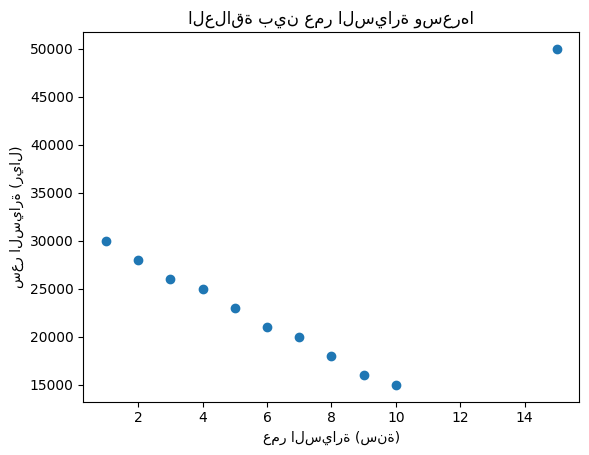

In [2]:
plt.scatter(df['Age'], df['Price'])
plt.xlabel('عمر السيارة (سنة)')
plt.ylabel('سعر السيارة (ريال)')
plt.title('العلاقة بين عمر السيارة وسعرها')
plt.show()


    Age
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
10   15 

0     30000
1     28000
2     26000
3     25000
4     23000
5     21000
6     20000
7     18000
8     16000
9     15000
10    50000
Name: Price, dtype: int64 

ميل الخط (a): 620.4419889502763
نقطة التقاطع مع محور y (b): 20779.00552486188


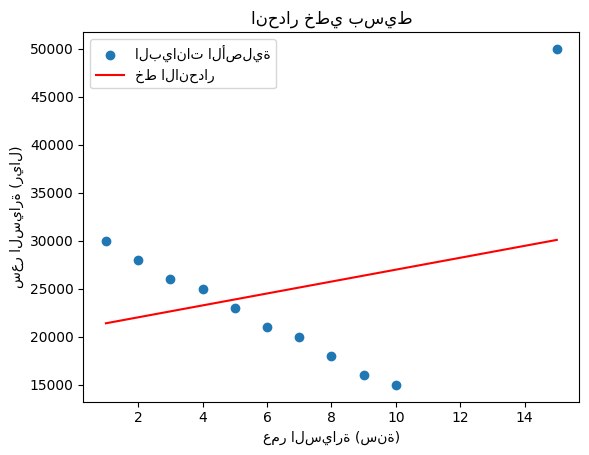

In [3]:
# فصل البيانات (X: المدخلات, y: المخرجات)
X = df[['Age']]  # يجب أن تكون بشكل عمودين
y = df['Price']
print(X, "\n")
print(y, "\n")


# إنشاء نموذج الانحدار وتدريبه
model = LinearRegression()
model.fit(X, y)

# ميل الخط (a)
print('ميل الخط (a):', model.coef_[0])

# نقطة التقاطع (b)
print('نقطة التقاطع مع محور y (b):', model.intercept_)


# التنبؤ بالقيم
predictions = model.predict(X)

# رسم خط الانحدار مع النقاط الأصلية
plt.scatter(df['Age'], df['Price'], label='البيانات الأصلية')
plt.plot(df['Age'], predictions, color='red', label='خط الانحدار')
plt.xlabel('عمر السيارة (سنة)')
plt.ylabel('سعر السيارة (ريال)')
plt.title('انحدار خطي بسيط')
plt.legend()
plt.show()


In [4]:
# توقع سعر سيارة عمرها 8 سنوات
age_new = pd.DataFrame({'Age': [30]})
predicted_price = model.predict(age_new)
print("سعر السيارة المتوقّع لعمر 30 سنوات:", predicted_price[0])


سعر السيارة المتوقّع لعمر 30 سنوات: 39392.26519337017


In [5]:
Q1 = df['Price'].quantile(0.25)  # الربع الأول
Q3 = df['Price'].quantile(0.75)  # الربع الثالث
IQR = Q3 - Q1

# أي صف خارج النطاق (Q1 - 1.5*IQR, Q3 + 1.5*IQR) يعتبر شاذًا
df_clean = df[(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]
print(df_clean)


   Age  Price
0    1  30000
1    2  28000
2    3  26000
3    4  25000
4    5  23000
5    6  21000
6    7  20000
7    8  18000
8    9  16000
9   10  15000


In [6]:
# توقع سعر سيارة عمرها 8 سنوات
age_new = pd.DataFrame({'Age': [7]})
predicted_price = model.predict(age_new)
print("سعر السيارة المتوقّع لعمر 30 سنوات:", predicted_price[0])

سعر السيارة المتوقّع لعمر 30 سنوات: 25122.099447513814


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = {
    'area': [60, 80, 100, 120, 140],
    'price': [200000, 250000, 280000, 310000, 360000]
}

df = pd.DataFrame(data)

df.head()

,area,price
0,60,200000
1,80,250000
2,100,280000
3,120,310000
4,140,360000


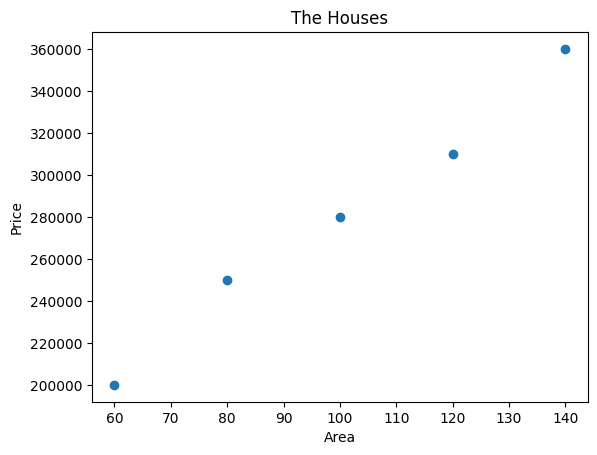

In [8]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('The Houses')
plt.show()

   area
0    60
1    80
2   100
3   120
4   140 

0    200000
1    250000
2    280000
3    310000
4    360000
Name: price, dtype: int64 

a =  1900.0

 b= 90000.0


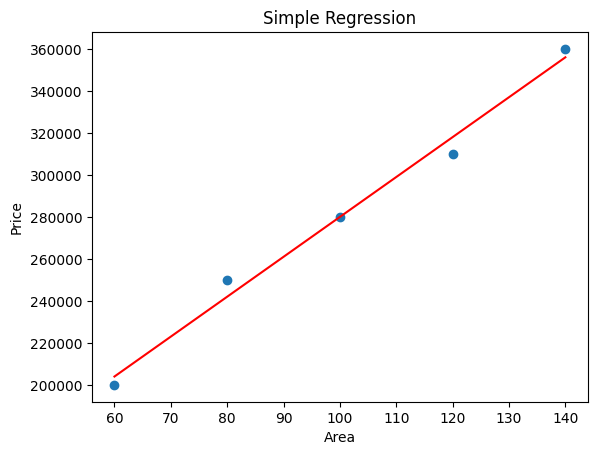

In [9]:
X = df[['area']]
y = df['price']

print(X, '\n')
print(y, '\n')

model = LinearRegression()
model.fit(X, y)

print('a = ', model.coef_[0])
print('\n b=', model.intercept_)

prediction = model.predict(X)

plt.scatter(df['area'], df['price'], label='Original Data')
plt.plot(df['area'], prediction, color='red', label='Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Regression')
#plt.legend()
plt.show()


In [10]:
# area 115


area_new = pd.DataFrame({'area': [115]})
predicted_price = model.predict(area_new)
print("Price of area 115: ", predicted_price)

Price of area 115:  [308500.]


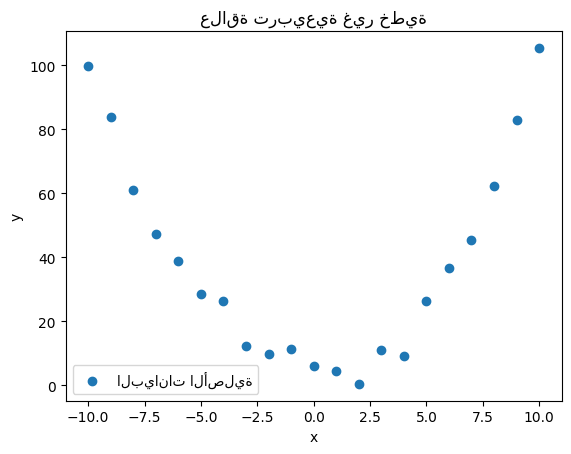

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# إنشاء بيانات غير خطية: y = x^2 + noise
x = np.arange(-10, 11, 1)
y = x**2 + np.random.normal(0, 5, size=x.shape)  # أضفنا بعض الضوضاء

df = pd.DataFrame({'x': x, 'y': y})

# رسم البيانات
plt.scatter(df['x'], df['y'], label='البيانات الأصلية')
plt.xlabel('x')
plt.ylabel('y')
plt.title('علاقة تربيعية غير خطية')
plt.legend()
plt.show()


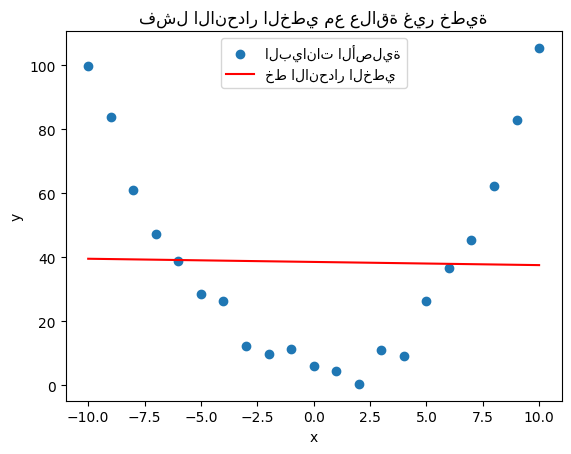

In [12]:
# بناء وتدريب النموذج
X = df[['x']]
model = LinearRegression()
model.fit(X, y)

# توقع القيم
y_pred = model.predict(X)

# رسم النتائج مع خط الانحدار الخطي
plt.scatter(df['x'], df['y'], label='البيانات الأصلية')
plt.plot(df['x'], y_pred, color='red', label='خط الانحدار الخطي')
plt.xlabel('x')
plt.ylabel('y')
plt.title('فشل الانحدار الخطي مع علاقة غير خطية')
plt.legend()
plt.show()
